In [1]:
import sys; sys.path.insert(0, "../"); from utils import *
from sympy import symbols, lambdify, sympify
import numpy as np
import torch

Running Python 3.9.8
You can use npar for np.array


### Parametric Advection-Diffusion discovery results

In [2]:
xs = np.linspace(-5, 5, 256)

In [3]:
const = 2*np.pi/5
ground1 = -const*np.sin(const*xs)
ground2 = -1.5 + np.cos(const*xs)
ground3 = npar([0.1])

In [4]:
est1 = -1.2553554773330688*np.sin(1.2564677000045776*xs)
est2 = -1.4997742176055908+np.cos(1.2567481994628906*xs)
est3 = npar([0.09986680001020432])

In [5]:
errs = npar([percent_error(est1, ground1), 
        percent_error(est2, ground2), 
        percent_error(est3, ground3)])

errs.mean(), errs.std()

(0.08696933248390322, 0.047897817294635)

In [6]:
all_params = [[-1.25623655,  1.25656128, -1.49985731,  1.25665808,  0.09997236], 
              [-1.25596786,  1.25678086, -1.49993205,  1.25670695,  0.09998032], 
              [-1.25149083,  1.25566435, -1.49853253,  1.25527477,  0.10061844], 
              [-1.25635958,  1.2565304 , -1.49984944,  1.25664961,  0.0999872 ], 
              [-1.25678468,  1.25660324, -1.49969542,  1.2565794 ,  0.10003757], 
              [-1.2556591 ,  1.2577163 , -1.4999721,  1.25608265,  0.10037906]]

In [7]:
def est_f1(params, domain): return params[0]*np.sin(params[1]*domain)
def est_f2(params, domain): return np.cos(params[3]*domain)+params[2]
def est_f3(params, domain): return npar(params[4])

In [8]:
for params in all_params:
    est1 = est_f1(params, xs)
    est2 = est_f2(params, xs)
    est3 = est_f3(params, xs)
    
    errs = npar([percent_error(est1, ground1), 
            percent_error(est2, ground2),
            percent_error(est3, ground3)])

    print(errs.mean(), errs.std())

0.024852436735562627 0.010641653510431812
0.033417744749667105 0.027418062927952274
0.412837556687257 0.19299865946375605
0.019478835222192056 0.010942981252159667
0.02368350538918333 0.009830008558860728
0.2431636185472076 0.13516544707743275


In [9]:
# 0.024852436735562627 0.010641653510431812
# 0.033417744749667105 0.027418062927952274
# 0.412837556687257 0.19299865946375605
# 0.03222090836266606 0.01712074867974253
# 0.02368350538918333 0.009830008558860728
# 0.24692653488759544 0.13004034389508512

In [10]:
# plotting
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 10})
plt.style.use('science')
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable

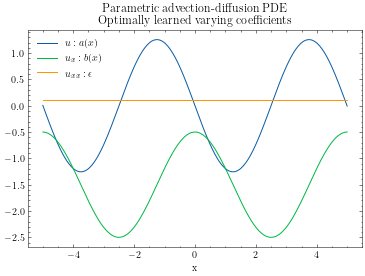

In [11]:
plt.figure(figsize=(6, 4))
plt.title("Parametric advection-diffusion PDE\n Optimally learned varying coefficients")
plt.plot(xs, est_f1(all_params[5], xs), label="$u: a(x)$")
plt.plot(xs, est_f2(all_params[5], xs), label="$u_{x}: b(x)$")
plt.plot(xs, [est_f3(all_params[5], xs).tolist() for _ in range(len(xs))], label="$u_{xx}: \epsilon$")
plt.xlabel('x')
plt.legend(loc="best")
plt.savefig(f"./vis_pics/Learned_Coefficients_noisy2.png", dpi=300)
plt.show()